In [1]:
import os
import pdb
import numpy as np
import matplotlib.pyplot as plt
from torch import Tensor
import torch.nn.functional as F
import cv2
from torchvision import transforms

from dataset import Chaos2DSegmentationDataset, get_image_pair_filepaths, NormalizeInstance
from utils import create_canvas

data_dir = os.path.join('CompositionalNets/', 'data', 'chaos')

Number of image pairs 2874 = Number of images 5748

    Input Image:
    	 Shape: (512, 512)
    	 Dtype: uint16
    	 Min and Max Values: [0, 2418]

    Target Image:
    	 Shape: (512, 512)
    	 Dtype: uint8
    	 Min and Max Values: [0, 1]



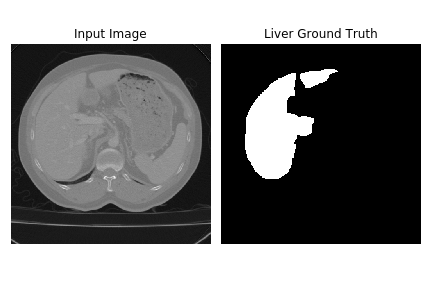

In [24]:
image_pair_filepaths = get_image_pair_filepaths(data_dir)
dataset = Chaos2DSegmentationDataset(image_pair_filepaths)
print(f'Number of image pairs {len(dataset)} = Number of images {len(dataset)*2}')
image, target = dataset[50]
print(f"""
    Input Image:
    \t Shape: {image.shape}
    \t Dtype: {image.dtype}
    \t Min and Max Values: [{image.min()}, {image.max()}]

    Target Image:
    \t Shape: {target.shape}
    \t Dtype: {target.dtype}
    \t Min and Max Values: [{target.min()}, {target.max()}]
""")

normalize = NormalizeInstance(255.0)
scaled_image = normalize(image)
create_canvas(scaled_image, target, title1='Input Image', title2='Liver Ground Truth')

In [29]:
t = transforms.ToTensor()(scaled_image)

In [33]:
target.astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
transforms.ToTensor()

In [29]:
t = Tensor(scaled_image).unsqueeze(0)
F.interpolate(t, size=224)

tensor([[[18.6663, 16.3462, 24.3610,  ..., 23.7283, 22.1464, 22.2519],
         [15.7134, 23.8337, 22.2519,  ..., 20.1427, 19.4045, 24.5720],
         [21.1973, 24.4665, 16.5571,  ..., 18.7717, 23.5174, 21.6191],
         ...,
         [23.4119, 26.8921, 21.4082,  ..., 23.3065, 25.7320, 20.2481],
         [23.7283, 23.3065, 23.7283,  ..., 23.0955, 26.7866, 22.2519],
         [19.8263, 23.3065, 27.3139,  ..., 22.7792, 22.2519, 26.5757]]])